<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula24b_multilayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

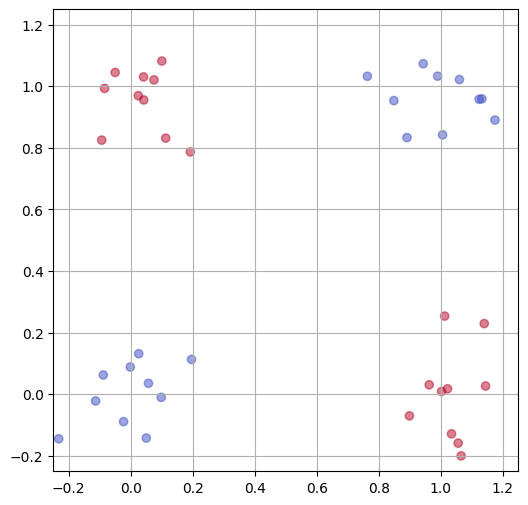

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 40

def generate_logical_dataset(n_samples, func=lambda a, b: bool(a) != bool(b)):
    X, y = make_blobs(n_samples=n_samples,
                      centers=[[0,0],[1,0],[1,1],[0,1]],
                      cluster_std=0.1)
    y = np.array([func(a>0.5, b>0.5) for a, b in zip(X[:,0], X[:,1])], dtype=int) * 2 -1
    return X, y

def plot_dataset(X, y, xlim=(-0.25, 1.25), ylim=(-0.25, 1.25)):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', alpha=0.5, cmap="coolwarm")
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.grid(True)

def plot_vector(weights):
    xs = [0, weights[0]]
    ys = [0, weights[1]]
    plt.plot(xs, ys, 'g-')

def plot_hyperplane(weights, bias):
    xs = np.array([-11, 11])
    ys = -(weights[0]*xs + bias)/weights[1]
    plt.plot(xs, ys, '--')


X, y = generate_logical_dataset(n_samples)
plot_dataset(X, y)
plt.show()

In [2]:
def define_axes(X):
  offset = 0.5
  min0, max0 = X[:, 0].min(), X[:, 0].max()
  min1, max1 = X[:, 1].min(), X[:, 1].max()
  return [min0-offset, max0+offset], [min1-offset, max1+offset]

def plot_predictions(model, X):
  axis0, axis1 = define_axes(X)
  x0s = np.linspace(axis0[0], axis0[1], 100)
  x1s = np.linspace(axis1[0], axis1[1], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  ypred = model.predict(X).reshape(x0.shape)
  plt.contourf(x0, x1, ypred, cmap='coolwarm', alpha=0.2)

1.0


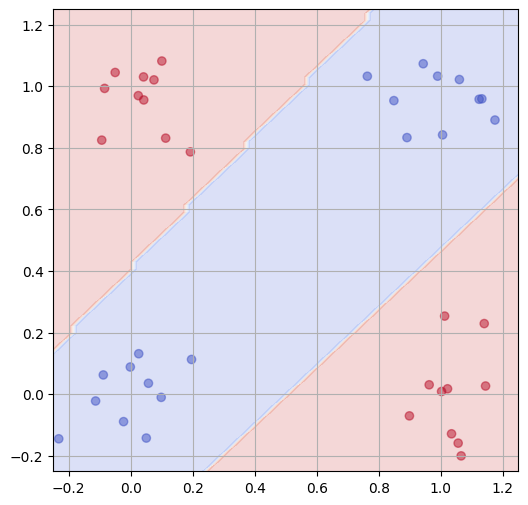

In [85]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def include_bias(X):
  ones = np.ones(shape=(X.shape[0],1))
  return np.hstack((ones, X))

class NeuralNetwork(BaseEstimator, ClassifierMixin):
  def __init__(self, n_hidden=[2], max_iter=10000, learning_rate=0.001):
    self.n_hidden = n_hidden
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def forward(self, X):
    self.A = []
    self.Z = []
    AUX = X.copy()
    for W in self.Ws:
      self.A.append(include_bias(AUX))
      self.Z.append(self.A[-1] @ W)
      AUX = np.tanh(self.Z[-1])
    return AUX

  def backward(self, y, ypred):
    grads = []
    output_delta = ypred - y
    grads.insert(0, self.A[-1].T @ output_delta)
    for i in range(len(self.Ws)-1, 0, -1):
      tanh_derivative = 1 - np.tanh(self.Z[i-1])**2
      input_delta = output_delta @ self.Ws[i][1:,:].T * tanh_derivative
      grads.insert(0, self.A[i-1].T @ input_delta)
      output_delta = input_delta
    for i in range(len(self.Ws)):
      self.Ws[i] -= grads[i] * self.learning_rate

  def fit(self, X, y):
    if len(y.shape) == 1:
      y = y.reshape(-1, 1)
    self.Ws = []
    previous_output = X.shape[1]
    for n in self.n_hidden:
      self.Ws.append(np.random.normal(size=(previous_output+1, n)))
      previous_output = n
    self.Ws.append(np.random.normal(size=(previous_output+1, y.shape[1])))
    for _ in range(self.max_iter):
      ypred = self.forward(X)
      self.backward(y, ypred)
    return self

  def predict(self, X):
    ypred = self.forward(X)
    return np.sign(ypred)

model = NeuralNetwork([2])
model.fit(X, y)
ypred = model.predict(X)
print(accuracy_score(y, ypred))
plot_dataset(X, y)
plot_predictions(model, X)
plt.show()

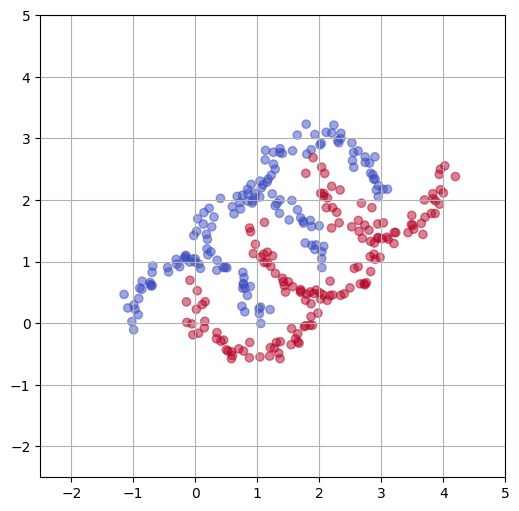

In [124]:
from sklearn.datasets import make_moons
def make_hard_dataset(n=100):
  X, y = make_moons(n_samples=n, noise=0.1)
  for i in range(1,3):
    Xn, yn = make_moons(n_samples=n, noise=0.1)
    X = np.vstack((X, Xn+i))
    y = np.hstack((y, yn))
  y = np.where(y%2 == 0, -1, 1)
  return X, y

X, y = make_hard_dataset()
plot_dataset(X, y, xlim=(-2.5, 5), ylim=(-2.5, 5))
plt.show()

1.0


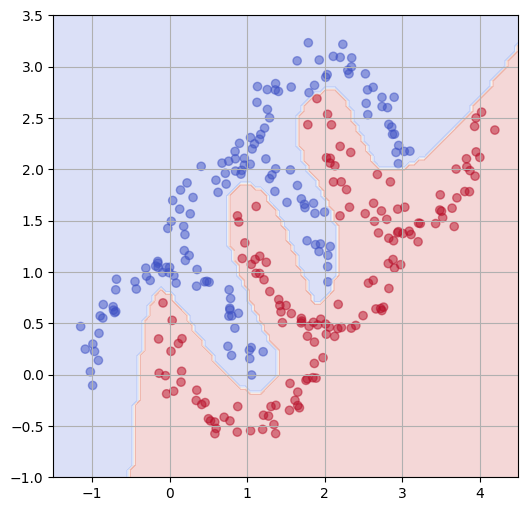

In [138]:
model = NeuralNetwork([10,10])
model.fit(X, y)
ypred = model.predict(X)
print(accuracy_score(y, ypred))
plot_dataset(X, y, xlim=(-1.5, 4.5), ylim=(-1, 3.5))
plot_predictions(model, X)
plt.show()